In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/terrorismData.csv')

In [3]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary


In [5]:
df.tail()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives


In [6]:
df.shape

(181691, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181256 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [10]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

if duplicate_rows.shape[0]> 0:
  df=df.drop_duplicates()
else:
  print('No duplicate rows detected')

(9504, 17)


In [11]:
df.shape

(172187, 17)

In [12]:
for column in df.select_dtypes(include=['object']).columns:
  print(f'Unique Values{column}:')
  print(df[column].unique)

Unique ValuesCountry:
<bound method Series.unique of 0         Dominican Republic
1                     Mexico
2                Philippines
3                     Greece
4                      Japan
                 ...        
181686               Somalia
181687                 Syria
181688           Philippines
181689                 India
181690           Philippines
Name: Country, Length: 172187, dtype: object>
Unique ValuesState:
<bound method Series.unique of 0                     NaN
1                 Federal
2                  Tarlac
3                  Attica
4                 Fukouka
               ...       
181686    Middle Shebelle
181687           Lattakia
181688        Maguindanao
181689            Manipur
181690        Maguindanao
Name: State, Length: 172187, dtype: object>
Unique ValuesRegion:
<bound method Series.unique of 0         Central America & Caribbean
1                       North America
2                      Southeast Asia
3                      Western Euro

In [14]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             435
Latitude        4011
Longitude       4012
AttackType         0
Killed          9433
Wounded        15267
Target           546
Summary        59092
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [23]:
df['Target'] = df['Target'].fillna('Unknown')
df['Summary']=df['Summary'].fillna('No data')

<ipython-input-23-619fddaa7883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].fillna('Unknown')
<ipython-input-23-619fddaa7883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary']=df['Summary'].fillna('No data')


In [24]:
df['Killed']=df['Killed'].fillna(df['Killed'].median())
df['Wounded'] = df['Wounded'].fillna(df['Wounded'].median())

<ipython-input-24-4dd46555fb92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Killed']=df['Killed'].fillna(df['Killed'].median())
<ipython-input-24-4dd46555fb92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wounded'] = df['Wounded'].fillna(df['Wounded'].median())


In [25]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           421
Region            0
City            435
Latitude       4011
Longitude      4012
AttackType        0
Killed            0
Wounded           0
Target            0
Summary           0
Group             0
Target_type       0
Weapon_type       0
dtype: int64

In [26]:
top_countries = df['Country'].value_counts().head(10)
print(top_countries)

Country
Iraq              23458
Pakistan          13795
Afghanistan       12512
India             11585
Colombia           7504
Philippines        6771
Peru               5048
United Kingdom     4998
El Salvador        4305
Somalia            4121
Name: count, dtype: int64


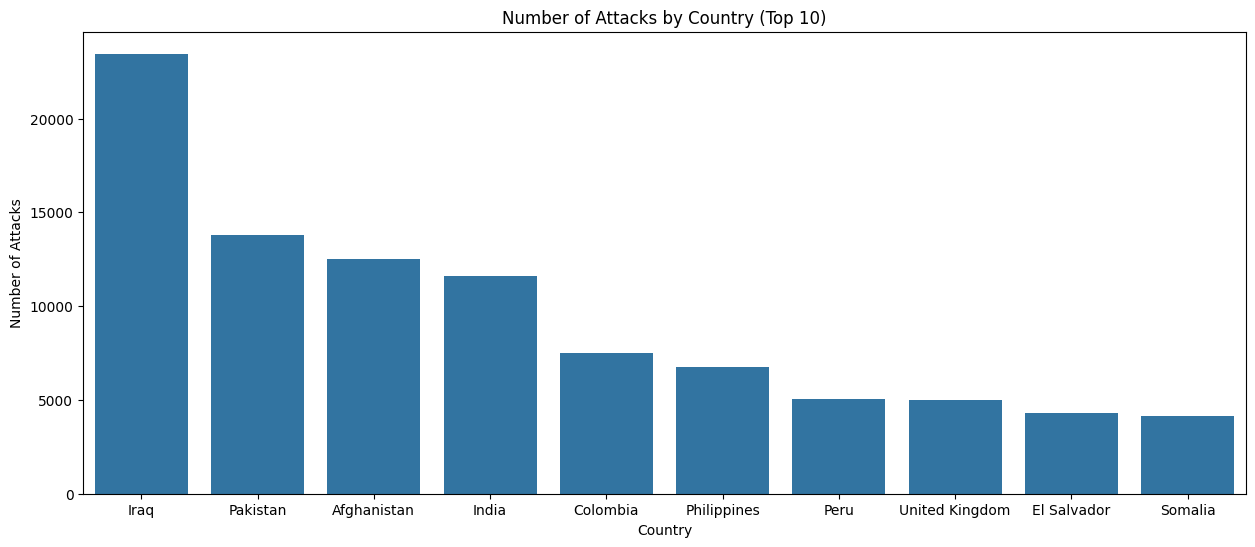

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.title('Number of Attacks by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.show()

In [28]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           421
Region            0
City            435
Latitude       4011
Longitude      4012
AttackType        0
Killed            0
Wounded           0
Target            0
Summary           0
Group             0
Target_type       0
Weapon_type       0
dtype: int64

In [29]:
columns_to_drop =['Latitude','Longitude','State','City']
df_cleaned = df.dropna(subset = columns_to_drop)

In [30]:
df_cleaned.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",No data,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,No data,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,1.0,0.0,U.S. Embassy,No data,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,1.0,0.0,U.S. Consulate,No data,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms


In [31]:
df.shape

(172187, 17)

In [32]:
df_cleaned.shape

(167339, 17)

In [34]:
dfa = df_cleaned

In [35]:
dfa.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
City           0
Latitude       0
Longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [36]:
dfa.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,167339.000000,167339.000000,167339.000000,167339.000000,1.673390e+05,167339.000000,167339.000000
mean,2003.326589,6.470070,15.531108,23.791534,-4.856691e+02,2.383975,3.055982
std,13.144260,3.391838,8.810815,18.305685,2.106870e+05,11.451657,35.711723
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.840929,7.314951e+00,0.000000,0.000000
50%,2010.000000,6.000000,15.000000,31.530243,4.349141e+01,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.666667,6.888707e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [37]:
dfa.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [38]:
dfa.dtypes

Year             int64
Month            int64
Day              int64
Country         object
State           object
Region          object
City            object
Latitude       float64
Longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
dtype: object

In [40]:
numerical_cols = dfa.select_dtypes(include=['int64','float64']).columns
dfa[numerical_cols] = dfa [numerical_cols].astype('float32')

<ipython-input-40-27195bd9edc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa[numerical_cols] = dfa [numerical_cols].astype('float32')


In [42]:
categorical_cols = dfa.select_dtypes(include=['object']).columns
dfa[categorical_cols] = dfa[categorical_cols].astype('category')

<ipython-input-42-30c696a10208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa[categorical_cols] = dfa[categorical_cols].astype('category')


In [43]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167339 entries, 1 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Year         167339 non-null  float32 
 1   Month        167339 non-null  float32 
 2   Day          167339 non-null  float32 
 3   Country      167339 non-null  category
 4   State        167339 non-null  category
 5   Region       167339 non-null  category
 6   City         167339 non-null  category
 7   Latitude     167339 non-null  float32 
 8   Longitude    167339 non-null  float32 
 9   AttackType   167339 non-null  category
 10  Killed       167339 non-null  float32 
 11  Wounded      167339 non-null  float32 
 12  Target       167339 non-null  category
 13  Summary      167339 non-null  category
 14  Group        167339 non-null  category
 15  Target_type  167339 non-null  category
 16  Weapon_type  167339 non-null  category
dtypes: category(10), float32(7)
memory usage: 18.3 MB


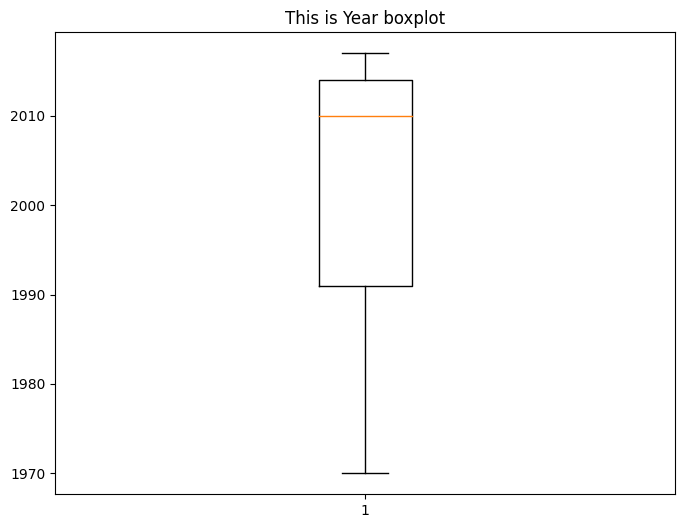

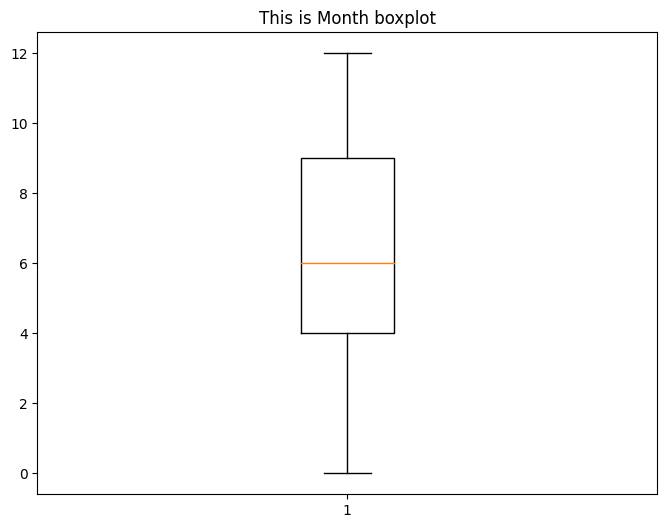

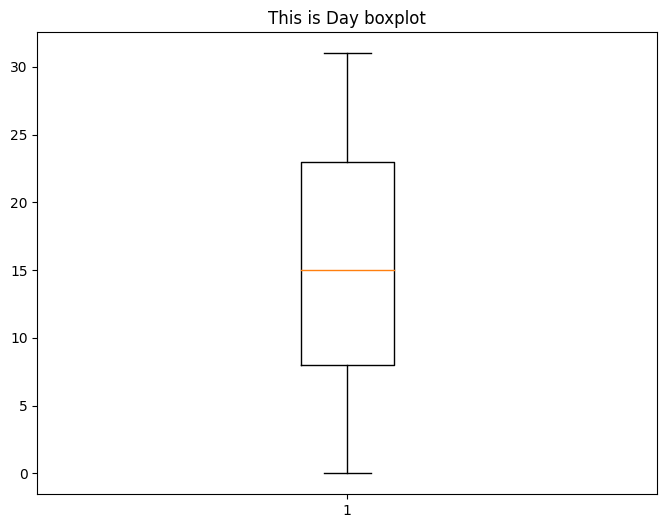

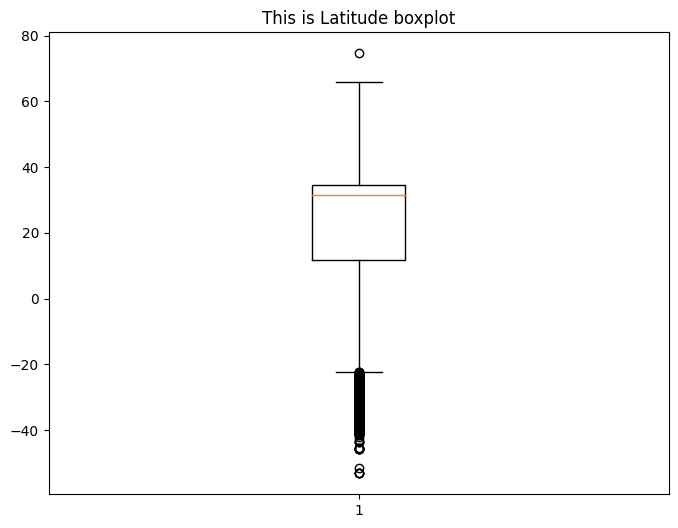

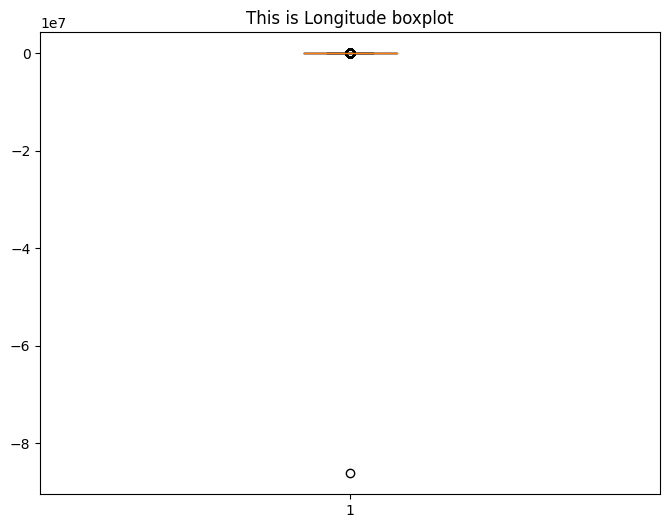

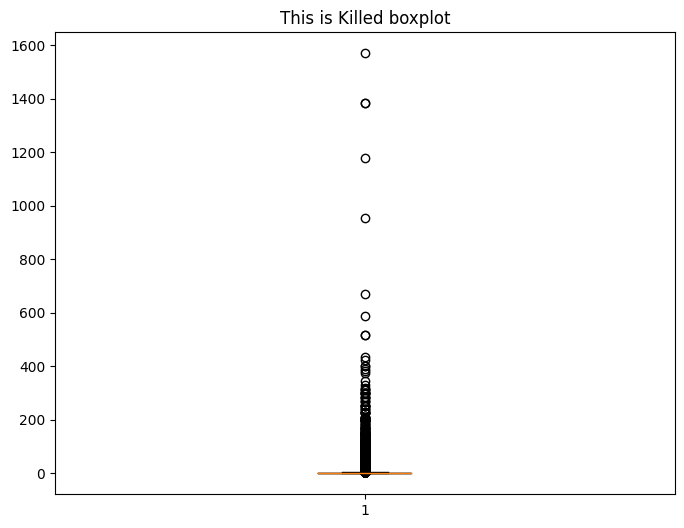

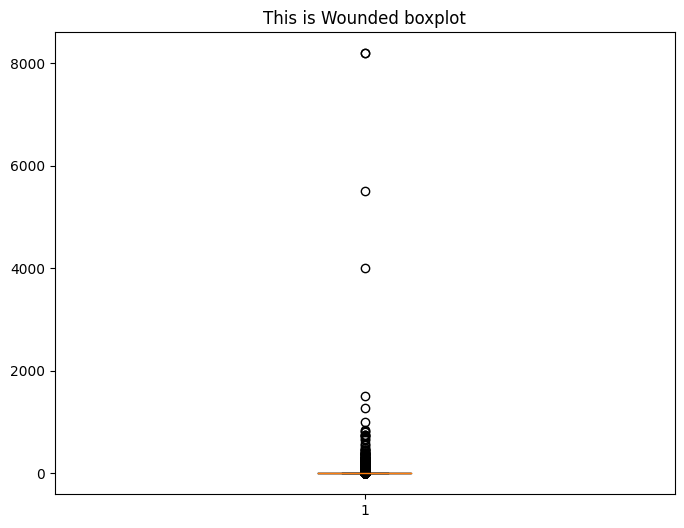

In [44]:
#boxplot
numerical_cols = dfa.select_dtypes(include = ['float32']).columns

for col in numerical_cols:
  plt.figure(figsize=(8,6))
  plt.boxplot(x=dfa[col])
  plt.title(f'This is {col} boxplot')
  plt.show()


In [46]:
dfa.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",No data,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599739,Assassination,1.0,0.0,Employee,No data,Unknown,Journalists & Media,Unknown
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,1.0,0.0,U.S. Embassy,No data,Unknown,Government (Diplomatic),Explosives
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580414,130.396362,Facility/Infrastructure Attack,1.0,0.0,U.S. Consulate,No data,Unknown,Government (Diplomatic),Incendiary
5,1970.0,1.0,1.0,United States,Illinois,North America,Cairo,37.005104,-89.176270,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms


pivot_table = dfa.pivot_table(index='AttackType', values=['Killed','Wounded'], aggfunc = 'sum', margins = True, margins_name = 'Total')
print(pivot_table)

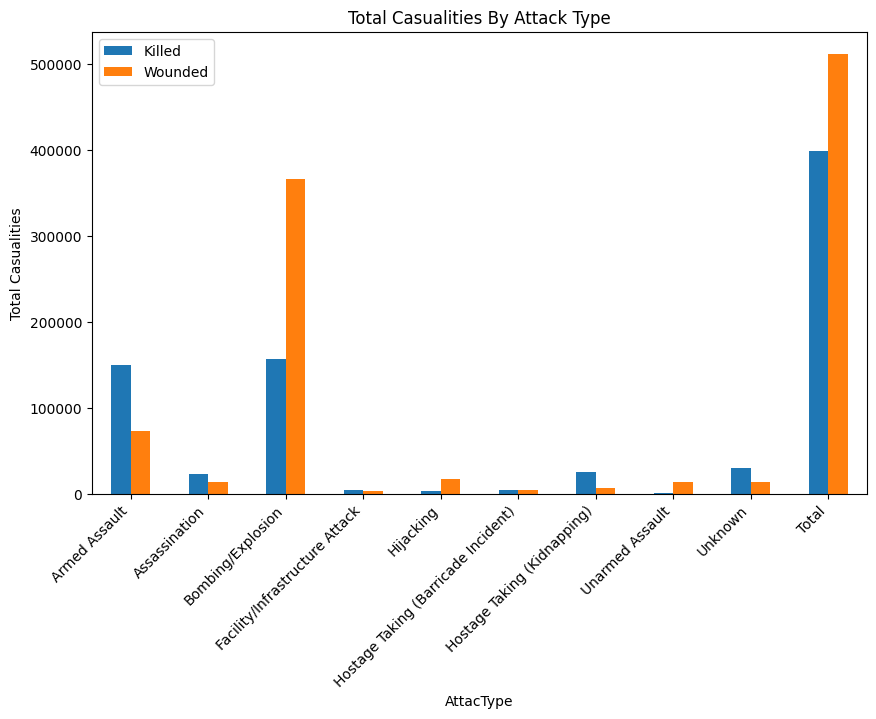

In [48]:
#pivot_table.drop('Total', inplace = True)
pivot_table.plot(kind='bar', figsize=(10,6))
plt.title("Total Casualities By Attack Type")
plt.xlabel("AttacType")
plt.ylabel('Total Casualities')
plt.xticks(rotation =45, ha='right')
plt.show()

In [49]:
pivot_table = dfa.pivot_table(index='Weapon_type', values=['Killed','Wounded'], aggfunc = 'sum', margins = True, margins_name = 'Total')
print(pivot_table)

                                                      Killed   Wounded
Weapon_type                                                           
Biological                                               8.0     805.0
Chemical                                               592.0   13651.0
Explosives                                          173899.0  379283.0
Fake Weapons                                             1.0       0.0
Firearms                                            164278.0   73406.0
Incendiary                                            5816.0    5179.0
Melee                                                 9528.0    5336.0
Other                                                  122.0     105.0
Radiological                                             0.0       0.0
Sabotage Equipment                                      84.0     286.0
Unknown                                              41436.0   16240.0
Vehicle (not to include vehicle-borne explosive...    3168.0   17094.0
Total 

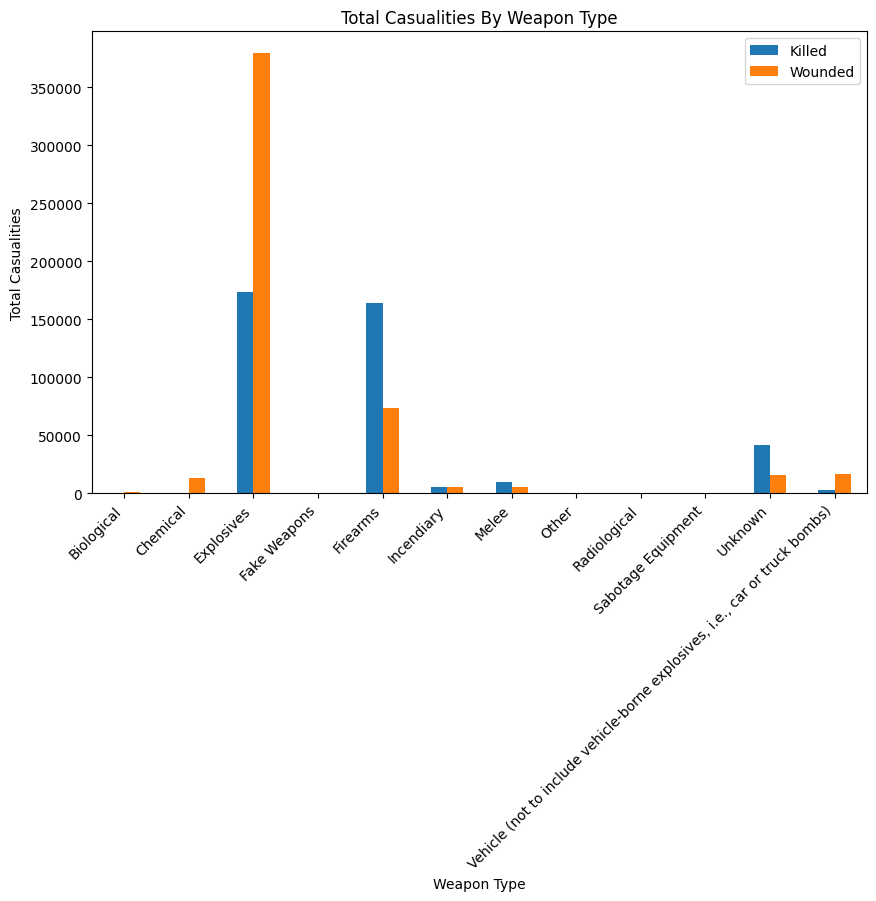

In [50]:
pivot_table.drop('Total', inplace = True)
pivot_table.plot(kind='bar', figsize=(10,6))
plt.title("Total Casualities By Weapon Type")
plt.xlabel("Weapon Type")
plt.ylabel('Total Casualities')
plt.xticks(rotation =45, ha='right')
plt.show()

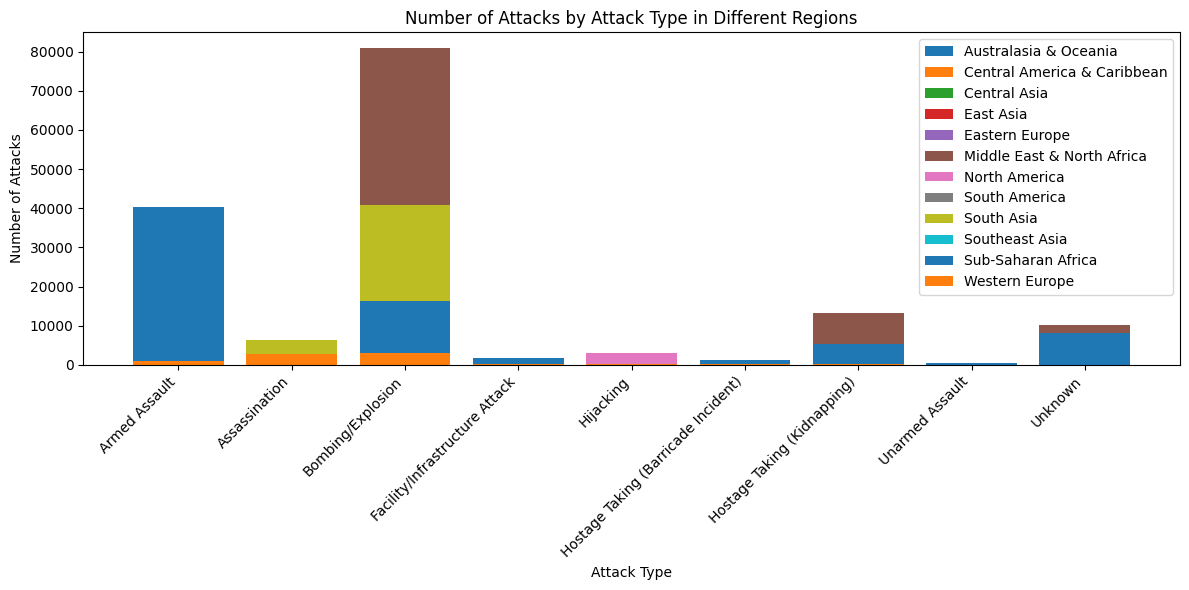

In [51]:
pivot_table = dfa.pivot_table(index='Region', columns = 'AttackType', values='Killed', aggfunc='sum', fill_value=0)
regions = pivot_table.index[:12]

fig, ax = plt.subplots(figsize=(12,6))

for region in regions:
  ax.bar(pivot_table.columns, pivot_table.loc[region], label=region)

ax.set_xlabel('Attack Type')
ax.set_ylabel('Number of Attacks')
ax.set_title("Number of Attacks by Attack Type in Different Regions")
ax.legend()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

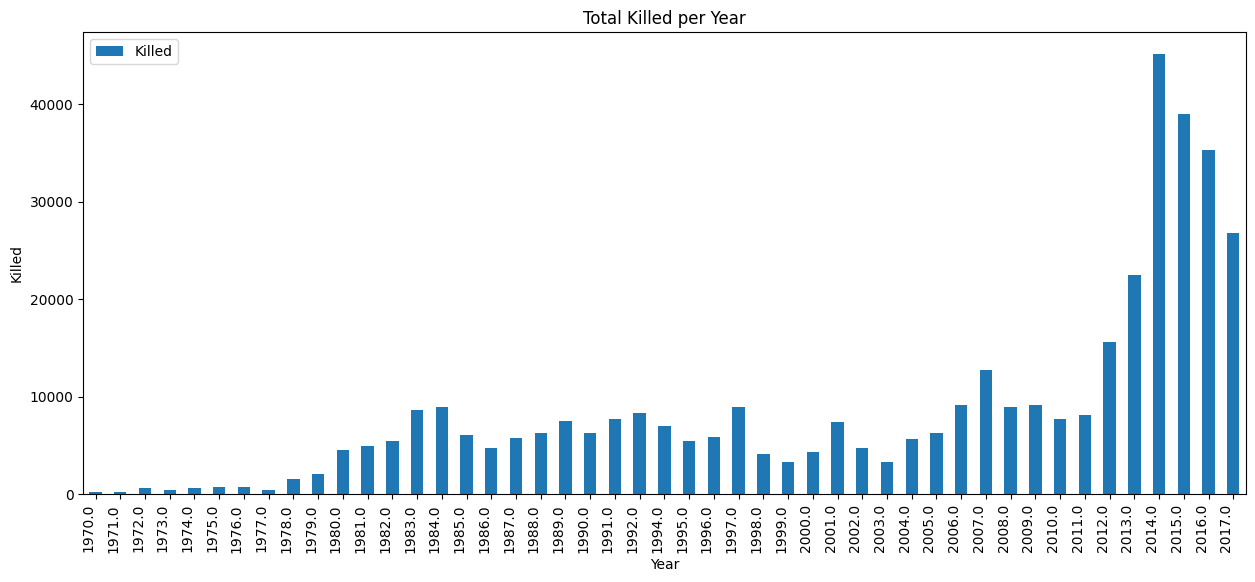

In [52]:
pivot_table = dfa.pivot_table(index="Year", values = "Killed", aggfunc='sum', margins = True, margins_name = 'Total')

pivot_table.drop('Total', inplace = True)
pivot_table.plot(kind='bar', figsize=(15,6))
plt.title("Total Killed per Year")
plt.xlabel("Year")
plt.ylabel('Killed')
plt.xticks(rotation =90, ha='right')
plt.show()